In [1]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle
import pandas as pd

from plotter import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('lumi.json') as f:
    lumis = json.load(f)

with open('xsec.json') as f:
    xs = json.load(f)

with open('pmap.json') as f:
    pmap = json.load(f)

In [3]:
year = '2016'
outsum = processor.dict_accumulator()

In [4]:
# Read the histogram from the pickle file
fatjetkin = pickle.load(open(year+'/fatjetkin.pkl','rb')).integrate('region','muoncontrol')
smalljetkin = pickle.load(open(year+'/smalljetkin.pkl','rb')).integrate('region','muoncontrol')
smalljetflav = pickle.load(open(year+'/smalljetflav.pkl','rb')).integrate('region','muoncontrol')
muonkin = pickle.load(open(year+'/muonkin.pkl','rb')).integrate('region','muoncontrol')

In [5]:
fatjetkin

<Hist (process,pt1,eta1,ddb1,n2ddt1) instance at 0x7f1d6d3408b0>

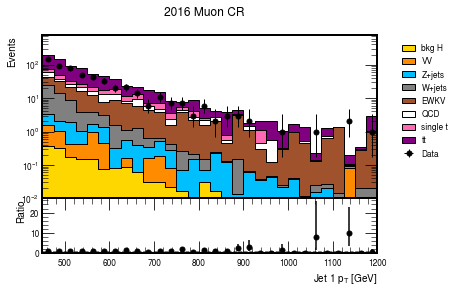

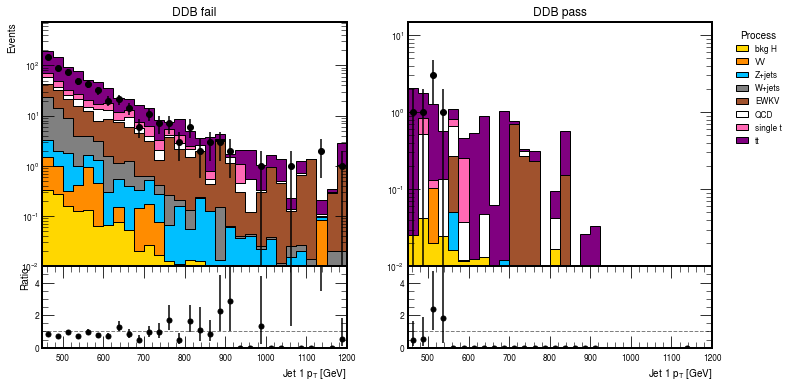

In [6]:
plot_datamc_muoncr(fatjetkin.sum('eta1','n2ddt1','ddb1'), year+'/datamc_mucr_pt1', 'Jet 1 $p_T$ [GeV]', year+' Muon CR')
plot_datamc_muoncr_pf(fatjetkin.sum('eta1','n2ddt1'), year+'/datamc_mucr_pt1', 'Jet 1 $p_T$ [GeV]')

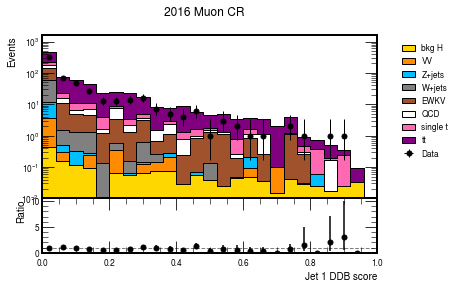

In [7]:
plot_datamc_muoncr(fatjetkin.sum('eta1','pt1','n2ddt1'), year+'/datamc_mucr_ddb1', 'Jet 1 DDB score', year+' Muon CR')

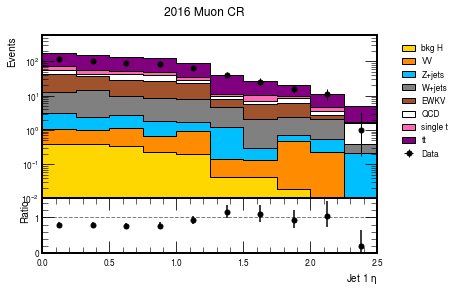

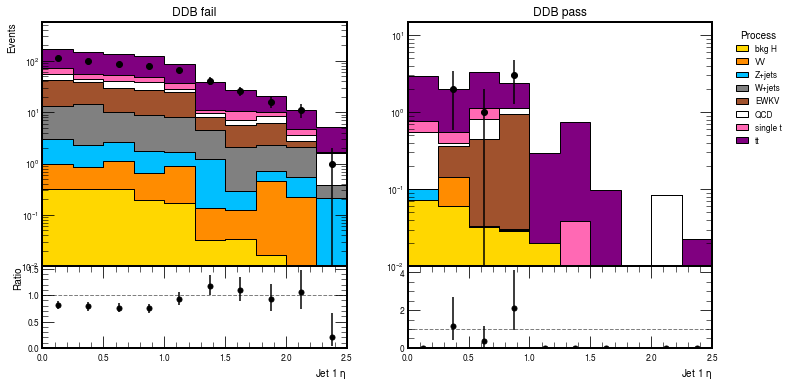

In [8]:
plot_datamc_muoncr(fatjetkin.sum('pt1','ddb1','n2ddt1'), year+'/datamc_mucr_eta1', 'Jet 1 $\eta$', year+' Muon CR', xlim=2.5)
plot_datamc_muoncr_pf(fatjetkin.sum('pt1','n2ddt1'), year+'/datamc_mucr_eta1', 'Jet 1 $\eta$',xlim=2.5)

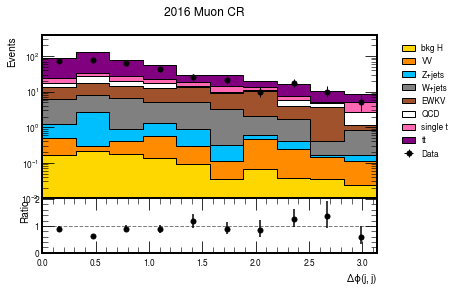

In [9]:
plot_datamc_muoncr(smalljetkin.sum('deta','mjj','ddb1'), year+'/datamc_mucr_dphi', '$\Delta \phi (j,j)$', year+' Muon CR', xlim=3.14)

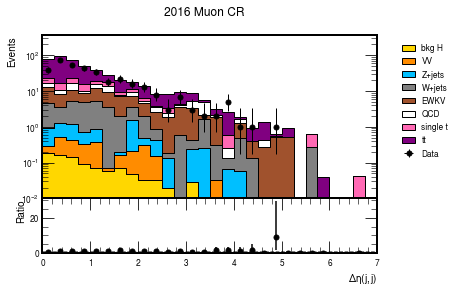

In [10]:
plot_datamc_muoncr(smalljetkin.sum('mjj','dphi','ddb1'), year+'/datamc_mucr_deta', '$\Delta \eta (j,j)$', year+' Muon CR', xlim=0)

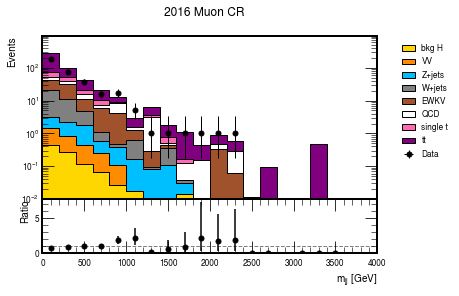

In [11]:
plot_datamc_muoncr(smalljetkin.sum('deta','dphi','ddb1'), year+'/datamc_mucr_mjj', '$m_{jj}$ [GeV]', year+' Muon CR', xlim=4000)

In [12]:
muonkin

<Hist (process,ptmu,etamu,ddb1) instance at 0x7f1d6d35ea30>

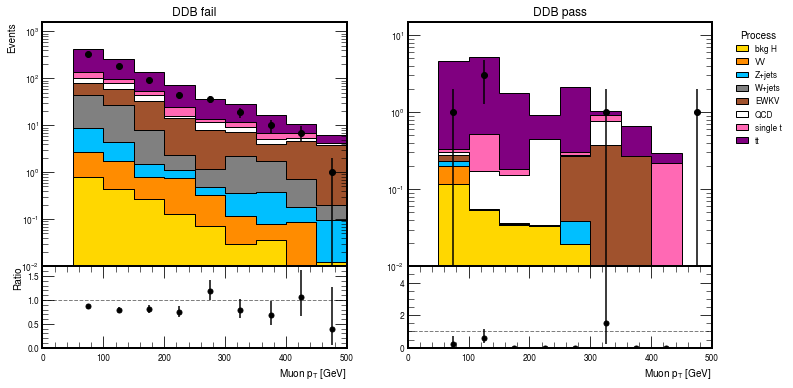

In [13]:
plot_datamc_muoncr_pf(muonkin.sum('etamu').rebin('ptmu', hist.Bin('ptmu', "rebinned ptmu", 10,0,500)), year+'/datamc_mucr_ptmu', 'Muon $p_T$ [GeV]')

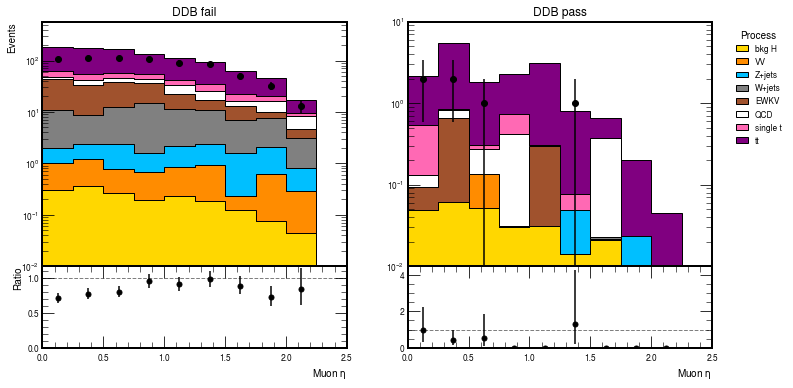

In [14]:
plot_datamc_muoncr_pf(muonkin.sum('ptmu'), year+'/datamc_mucr_etamu', 'Muon $\eta$',xlim=2.5)

In [15]:
templates = pickle.load(open(year+'/templates.pkl','rb')).integrate('region','muoncontrol').integrate('systematic','nominal').sum('pt1','genflavor').integrate('mjj',overflow='allnan')
cutflow = pickle.load(open(year+'/cutflow.pkl','rb'))
cutflow = cutflow.sum('genflavor').integrate('region','muoncontrol')

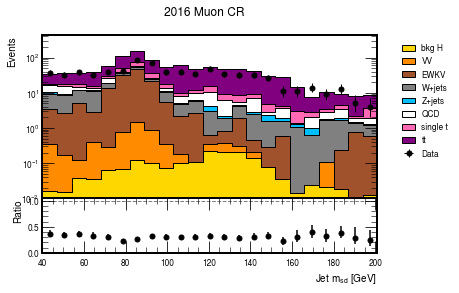

In [16]:
fig = plt.figure()
plt.suptitle(year + ' Muon CR')

ax1 = fig.add_subplot(4,1,(1,3))
plt.subplots_adjust(hspace=0)

# https://matplotlib.org/stable/gallery/color/named_colors.html                                                       
labels = ['tt','single t','QCD','Z+jets','W+jets','EWKV','VV','bkg H'] 
mc = ['ttbar','singlet','QCD','Zjets','Wjets',['EWKZ','EWKW'],'VV',['ZH','WH','ttH','ggF']]    
colors=['purple','hotpink','white','deepskyblue','gray','sienna','darkorange','gold']

mc = [x for x in reversed(mc)]
colors = [x for x in reversed(colors)]
labels = [x for x in reversed(labels)]                                                                  
        
h = templates.sum('ddb1')
# Plot stacked hist                                                                                                   
hist.plot1d(h,order=mc,stack=True,fill_opts={'color':colors,'edgecolor':'black','linewidth':1})                              
# Overlay data                                                                                                            
hist.plot1d(h.integrate('process','muondata'),error_opts={'marker':'o','color':'k','markersize':5}) 
labels = labels + ['Data']

ax1.get_xaxis().set_visible(False)                                                                                               
plt.legend(labels=labels,bbox_to_anchor=(1.05, 1), loc='upper left')    

allweights = hist.export1d(h.integrate('process','muondata')).numpy()[0] 
ax1.set_yscale('log')
ax1.set_ylim(0.01,5*np.amax(allweights)) 

# ratio                                                                                                                   
ax2 = fig.add_subplot(4,1,(4,4))
hist.plotratio(num=h.integrate('process','muondata'),denom=h.integrate('process'),ax=ax2,unc='num',error_opts={'marker':'o','color':'k','markersize':5},guide_opts={})
ax2.set_ylabel('Ratio')    
ax2.set_xlabel('Jet $m_{sd}$ [GeV]') 
ax2.set_xlim(ax1.get_xlim())

name = year+'/datamc_mucr_msd1'
png_name = name+'.png'
plt.savefig(png_name,bbox_inches='tight')

pdf_name = name+'.pdf'
plt.savefig(pdf_name,bbox_inches='tight')

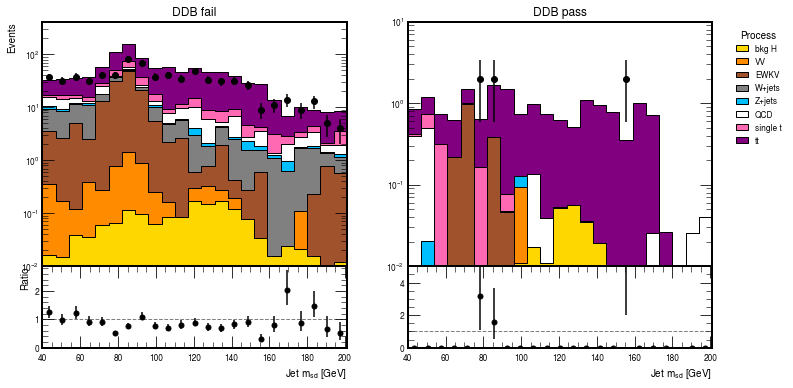

In [17]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, gridspec_kw={'height_ratios': [3,1]},figsize=(12,6))
plt.subplots_adjust(hspace=0)
    
# https://matplotlib.org/stable/gallery/color/named_colors.html                                                       
labels = ['tt','single t','QCD','Z+jets','W+jets','EWKV','VV','bkg H'] 
mc = ['ttbar','singlet','QCD','Zjets','Wjets',['EWKZ','EWKW'],'VV',['ZH','WH','ttH','ggF']]    
colors=['purple','hotpink','white','deepskyblue','gray','sienna','darkorange','gold']

mc = [x for x in reversed(mc)]
colors = [x for x in reversed(colors)]
labels = [x for x in reversed(labels)]  

hpass = templates.integrate('ddb1',int_range=slice(0.64,1))
hfail = templates.integrate('ddb1',int_range=slice(0,0.64))
                           
hist.plot1d(hfail,order=mc,stack=True,fill_opts={'color':colors,'edgecolor':'black','linewidth':1},ax=ax1)
ax1.get_legend().remove()
muondata = hfail.integrate('process','muondata')
x=muondata.axes()[0].centers()
bins=muondata.axes()[0].edges()
ax1.errorbar(x=x,y=muondata.values()[()],yerr=np.sqrt(muondata.values()[()]),marker='o',linestyle='',color='black')

ax1.get_xaxis().set_visible(False)

allweights =  hist.export1d(hfail.integrate('process','muondata')).numpy()[0] 
ax1.set_yscale('log')
ax1.set_ylim(0.01,5*np.amax(allweights))         
    
ax1.title.set_text("DDB fail")

# ratio                                                                                                                   
hist.plotratio(num=hfail.integrate('process','muondata'),denom=hfail.integrate('process',mc),unc='num',error_opts={'marker':'o','color':'k','markersize':5},guide_opts={},ax=ax3)   
ax3.set_ylabel("Ratio")
if ax3.get_ylim()[1] > 5:
    ax3.set_ylim(ax3.get_ylim()[0],5)
ax3.set_xlabel('Jet $m_{sd}$ [GeV]') 
ax3.set_xlim(ax1.get_xlim())
                                                                                        
hist.plot1d(hpass,order=mc,stack=True,fill_opts={'color':colors,'edgecolor':'black','linewidth':1},ax=ax2,legend_opts={'labels':labels,'bbox_to_anchor':(1.05, 1),'loc':'upper left'})
muondata = hpass.integrate('process','muondata')
x=muondata.axes()[0].centers()
bins=muondata.axes()[0].edges()
ax2.errorbar(x=x,y=muondata.values()[()],yerr=np.sqrt(muondata.values()[()]),marker='o',linestyle='',color='black') 
    
ax2.title.set_text("DDB pass")
    
ax2.set_xlim(ax1.get_xlim())
ax2.get_xaxis().set_visible(False)    
ax2.set_ylabel("")
allweights =  hist.export1d(hpass.integrate('process','muondata')).numpy()[0] 
ax2.set_yscale('log')
ax2.set_ylim(0.01,5*np.amax(allweights))   

# ratio                                                                                                                   
hist.plotratio(num=hpass.integrate('process','muondata'),denom=hpass.integrate('process',mc),unc='num',error_opts={'marker':'o','color':'k','markersize':5},guide_opts={},ax=ax4)  
    
ax4.set_ylabel("")
if(ax4.get_ylim()[1] > 5):
    ax4.set_ylim(ax4.get_ylim()[0],5)
ax4.set_xlabel('Jet $m_{sd}$ [GeV]') 
ax4.set_xlim(ax1.get_xlim())

name = year+'/datamc_mucr_msd1'
png_name = name+'_PF.png'
plt.savefig(png_name,bbox_inches='tight')

pdf_name = name+'_PF.pdf'
plt.savefig(pdf_name,bbox_inches='tight')

In [18]:
df1 = pd.DataFrame([])

df1['QCD'] = cutflow.values()[('QCD',)]
df1['Wjets'] = cutflow.values()[('Wjets',)]
df1['Zjets'] = cutflow.values()[('Zjets',)]
df1['EWKW'] = cutflow.values()[('EWKW',)]
df1['EWKZ'] = cutflow.values()[('EWKZ',)]
df1['VV'] = cutflow.values()[('VV',)]
df1['ttbar'] = cutflow.values()[('ttbar',)]
df1['singlet'] = cutflow.values()[('singlet',)]

df1 = df1.astype('int')[:12]
df1.index=['nothing','muontrigger','lumimask','metfilter','minjetkinmu', 'jetid', 'n2ddt', 'ak4btagMedium08', 'onemuon', 'muonkin', 'muonDphiAK8','ddbpass']
df1[1:12].to_latex(buf=year+'/cutflow-muoncr.tex')

In [19]:
df1

,QCD,Wjets,Zjets,EWKW,EWKZ,VV,ttbar,singlet
nothing,669639265,55627176,8395958,1096767,136663,936785,7126509,1885775
muontrigger,669639265,55627176,8395958,1096767,136663,936785,7126509,1885775
lumimask,669639265,55627176,8395958,1096767,136663,936785,7126509,1885775
metfilter,668702296,55594729,8387903,1095630,136496,936195,7120642,1884582
minjetkinmu,14921369,251068,107139,16225,2289,3657,121208,13490
jetid,14921369,251068,107139,16225,2289,3657,121208,13490
n2ddt,2772590,77935,39429,7373,1022,1659,35672,4538
ak4btagMedium08,486612,15090,8427,2859,253,344,21245,2522
onemuon,1148,334,97,213,3,18,3008,287
muonkin,284,245,59,162,2,8,2276,202
